## Multiple Linear Regression
In this lab, I look into linear regression with multiple features (4 in this case). Like simple regression, I build a model to predict prices of house, check the cost or error of the model and implement gradient descent to find best values for bias, b, and weight, w, to reduce the cost and improve the model.

In [146]:
# import modules 
import math, copy
import numpy as np 
import matplotlib.pyplot as plt

## The Model
The training data has size of house, number of bedrooms, age of the house, and number of floors as features. [2104, 5, 1, 45] corresponds to the features. The target or label is the price of the house. 

### Training Set
The features are the x_train, while the targets are the y_train. I also initialize the w and b with optimal values.

In [20]:
x_train = np.array([[2104, 5, 1, 45], # the features
                    [1416, 3, 2, 40],  
                    [852, 2, 1, 35]]) 
y_train = np.array([460, 232, 178])   # the prices of the 3 houses as the target values, corresponding to their features

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

### Model with Loops
Though not recommended in such cases, for loop can be used to create the model.

In [21]:
def model_loop(x, w, b):
    m = x.shape[0]
    y_pred = 0                    # initialize the predicted value
    for i in range(m):
        y_pred_1 = w[i] * x[i]       # multiplying element by element
        y_pred = y_pred + y_pred_1
    y_pred = y_pred + b             # I add the b later since it's just one
    return y_pred

#model_loop(x_train, w_init, b_init)

# Predict a row 
x_row = x_train[0, :]
#print(x_row)

model_loop(x_row, w_init, b_init)


459.9999976194083

### Model with Dot Product
Using dot product implements vectorization, which is efficient, multiplying feature by feature and perfectly summing them up. It is also faster.

In [22]:
def model_main(x, w, b):
    prediction = np.dot(w, x) + b
    return prediction

model_main(x_row, w_init, b_init)

459.9999976194082

## Cost Function with Multiple Features
The cost function as learned earlier is the error between the predicted and the actual target or label value.

In [79]:
def cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        prediction = np.dot(w, x[i]) + b   # individual predicted values plus b
        #return prediction
        cost_i = (prediction - y[i])**2  # individual cost
        cost = cost + cost_i         # summing the cost together
    total_cost = (1/(2*m))*cost    # using the cost function to find the total error 
    return total_cost
        
#cost(x_train, y_train, w_init, b_init) 
        

## Gradient Descent
We want to find values of b and w at which there is zero error (cost) or very close to zero. It's bassically the point where the line or curve converge. 

### Gradient
First, as exactly in the gradient descent formular, we find the gradient or the slope. Remember, the slope is as a result of defferentiating the cost function.

In [80]:
def gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = x.shape[0]
    for i in range(m):
        prediction = np.dot(w, x[i]) + b  

        # gradient with respect to w
        dj_dw_i = (prediction - y[i]) * x[i]
        dj_dw = dj_dw + dj_dw_i

        # gradient with respect to b
        dj_db_i = (prediction - y[i])
        dj_db = dj_db + dj_db_i
        
    #main gradients applying the m division in the function
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

#gradient(x_train, y_train, w_init, b_init)


### Gradient Descent
We iterate further to get the best values of b and w that the cost is 0 or almost 0 in a case that the function doesn't converge

In [129]:
def gradient_descent(x, y, alpha, iterations, w, b, cost_function, gradient_function):

    J_history = []
       
    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Equate w and b to iterate further
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # add the cost value after every iteration
        if i < 1000:
            J_history.append( cost_function(x, y, w, b))

        if i% math.ceil(iterations / 10) == 0:
            
            # This makes the formatting work provided the function is called with w as a zero vector of one row
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}, w:{w}, b: {b}  ") 


            # This supports the second way of calling the function and indexing to get the various last values, not recommended
            #print(f"Iteration: {i:4d} Cost : {list(J_history)[-1][-1]}, w: {w}, b: {b}  ")
            
    return w, b, J_history

# great way to call the function with special attention to w and b as vectors and not scalers
w_final, b_final, J_hist = gradient_descent(x_train, y_train, 5.0e-7, 1000, np.zeros_like(w_init), 0., cost, gradient)

# below is a my way of calling the function initially, but it returns J_history, w and b as arrays instead of vectors
# y = gradient_descent(x_train, y_train, 5.0e-7, 1000, 0, 0, cost, gradient)
        
    

Iteration    0: Cost  2529.46, w:[2.41334667e-01 5.58666667e-04 1.83666667e-04 6.03500000e-03], b: 0.000145  
Iteration  100: Cost   695.99, w:[ 0.20235171  0.00079796 -0.00099658 -0.00219736], b: -0.00011985961877688924  
Iteration  200: Cost   694.92, w:[ 0.20253446  0.00112715 -0.00214349 -0.00940619], b: -0.00035965781839536297  
Iteration  300: Cost   693.86, w:[ 0.2027164   0.00145611 -0.00328876 -0.01658286], b: -0.0005983240279392167  
Iteration  400: Cost   692.81, w:[ 0.20289753  0.00178484 -0.00443238 -0.02372751], b: -0.0008358632706869378  
Iteration  500: Cost   691.77, w:[ 0.20307785  0.00211335 -0.00557437 -0.03084027], b: -0.0010722805476294606  
Iteration  600: Cost   690.73, w:[ 0.20325736  0.00244162 -0.00671473 -0.0379213 ], b: -0.0013075808375690539  
Iteration  700: Cost   689.71, w:[ 0.20343608  0.00276967 -0.00785347 -0.04497072], b: -0.0015417690972177685  
Iteration  800: Cost   688.70, w:[ 0.20361399  0.00309749 -0.00899059 -0.05198869], b: -0.00177485026129

## Predicting with New Model
This model relies on the final values of b and w to make predictions

In [169]:
print(w_final, b_final)
m = x_train.shape[0]
for i in range(m):
    print(f" predicting the x train values using our current parameters, we get {np.dot(w_final, x_train[i]) + b_final}, which compares to the original values {y_train[i]}")


[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] -0.0022354075309325345
 predicting the x train values using our current parameters, we get 426.18530497189204, which compares to the original values 460
 predicting the x train values using our current parameters, we get 286.1674720078562, which compares to the original values 232
 predicting the x train values using our current parameters, we get 171.46763087132317, which compares to the original values 178


900

## Visualize Cost 
Below, cost is plotted against iterations.

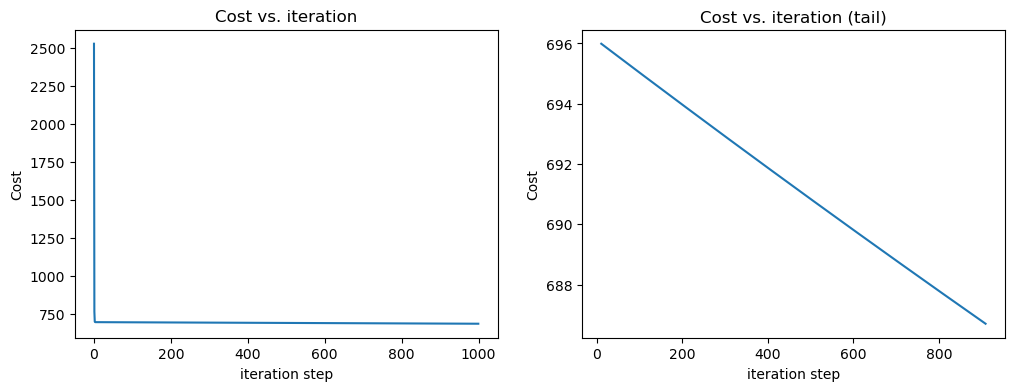

In [187]:
fig, axes= plt.subplots(1, 2, figsize = (12, 4))
axes[0].plot(J_hist) # plot just cost values over the 1000 iterations
axes[1].plot(np.arange(len(J_hist[100:]))+10, J_hist[100:]) #plots cost values at iteration 100 to 1000
axes[0].set_title("Cost vs. iteration");  axes[1].set_title("Cost vs. iteration (tail)")
axes[0].set_ylabel('Cost')             ;  axes[1].set_ylabel('Cost') 
axes[0].set_xlabel('iteration step')   ;  axes[1].set_xlabel('iteration step') 
plt.show()